In [234]:
# Imports necessary modules
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# Creates dataframe
connection = sqlite3.connect("movies.db")
df = pd.read_sql_query("SELECT * FROM ratingUrl", connection)
connection.close()

In [236]:
# Formats dataframe

# Renames true_budget to trueBudget
df = df.drop(['trueScore','budget'], axis=1)
df.rename(columns={"true_Score": "trueScore"}, inplace=True)

# Calculates totalVotes & rawScore and adds them to dataframe
rawScore = [np.NaN]*1000
df["rawScore"]=rawScore
totalVotes = [np.NaN]*1000
df["totalVotes"]=rawScore
df["totalVotes"]=df["totalVotes"].astype("float64")
for i in df.iterrows():
    totalVotes = i[1]["One"]+i[1]["Two"]+i[1]["Three"]+i[1]["Four"]+i[1]["Five"]+i[1]["Six"]+i[1]["Seven"]+i[1]["Eight"]+i[1]["Nine"]+i[1]["Ten"]
    df.set_value(i[0],"totalVotes", totalVotes)
    if totalVotes!=0:
        rawScore = 1*(i[1]["One"]/totalVotes)+2*(i[1]["Two"]/totalVotes)+3*(i[1]["Three"]/totalVotes)+4*(i[1]["Four"]/totalVotes)+5*(i[1]["Five"]/totalVotes)+6*(i[1]["Six"]/totalVotes)+7*(i[1]["Seven"]/totalVotes)+8*(i[1]["Eight"]/totalVotes)+9*(i[1]["Nine"]/totalVotes)+10*(i[1]["Ten"]/totalVotes)
        df.set_value(i[0],"rawScore", rawScore)

# Changes weighedScore column's type from string to float
df["weighedScore"]=df["weighedScore"].astype("float64")

# Changes ratingURL column to movieId
df = df.rename(columns={"ratingUrl": "movieId"})
for i in df.iterrows():
    df.set_value(i[0],"movieId", df["movieId"][i[0]][-17:-8])

# Adds column diffTrueWeighed which contains trueScore-weighedScore for each movie
diffTrueWeighed = df["trueScore"]-df["weighedScore"]
df["diffTrueWeighed"] = diffTrueWeighed

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [237]:
df

,Name,movieId,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten,weighedScore,trueScore,rawScore,totalVotes,diffTrueWeighed
0,Bright,tt5519340,1490,1070,1884,3023,6016,12017,18186,13603,5889,8952,6.5,6.665689,6.962471,72130.0,0.165689
1,Star Wars: Episode VIII - The Last Jedi,tt2527336,15770,5071,6266,7634,12898,23610,40925,54807,44344,44670,7.5,7.106200,7.234997,255995.0,-0.393800
2,Jumanji: Welcome to the Jungle,tt2283362,497,165,228,434,1115,3537,8699,7865,3191,3844,7.3,7.215622,7.473068,29575.0,-0.084378
3,The Greatest Showman,tt1485796,267,95,163,271,555,1269,2705,4592,4430,7974,8.0,7.648651,8.409121,22321.0,-0.351349
4,Justice League,tt0974015,4311,1600,2799,4977,10834,21874,36310,31626,16045,31683,7.0,6.889319,7.340802,162059.0,-0.110681
5,Blade Runner 2049,tt1856101,3178,1312,1642,2307,4442,9403,21271,42839,53088,43933,8.3,7.812001,8.218057,183415.0,-0.487999
6,The Shape of Water,tt5580390,263,73,83,116,248,575,1701,3263,2757,2606,8.2,7.755558,8.104065,11685.0,-0.444442
7,Pitch Perfect 3,tt4765284,250,100,203,342,657,1213,1366,787,342,760,6.3,6.322555,6.565781,6020.0,0.022555
8,Dunkirk,tt5013056,4470,1608,2196,3492,7455,18534,45210,77768,76307,62842,8.1,7.729406,8.104915,299882.0,-0.370594
9,It,tt1396484,4122,1872,2654,4125,8704,19656,43966,59313,36731,32425,7.6,7.357924,7.636345,213568.0,-0.242076


In [238]:
df["diffTrueWeighed"].describe()

count    982.000000
mean       0.023456
std        0.474654
min       -2.600000
25%       -0.178026
50%        0.018761
75%        0.196217
max        4.400000
Name: diffTrueWeighed, dtype: float64

In [272]:
# Returns scores that correspond to given constraints
def getScores(minVotes, maxVotes):
    tempVotes = []
    tempDiff = []
    for i in df.iterrows():
        if i[1]["totalVotes"]>minVotes and i[1]["totalVotes"]<maxVotes:
            tempVotes.append(i[1]["totalVotes"])
            tempDiff.append(i[1]["diffTrueWeighed"])
    
    return list(tempVotes, tempDiff)

983 points of data


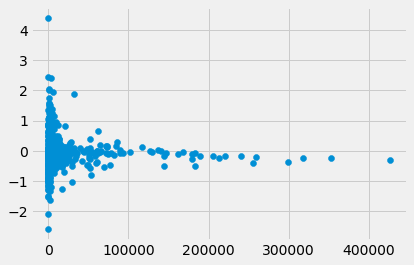

In [280]:
votes, diff = getScores(0, 1000000000)
plt.style.use('fivethirtyeight')
plt.scatter(votes, diff)
print(len(votes), "points of data")